# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import config
import os
from time import sleep
from config import weather_api_key
from citipy import citipy
from scipy.stats import linregress

query_url = "api.openweathermap.org/data/2.5/weather?q="
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}"
# query_url = f"{url}appid={weather_api_key}&units={units}"

## Generate Cities List

In [14]:
from scipy import integrate

cities = []
latitude_longitude = []
#Latitude & Longitude ranges
coords_lat_range = (-90, 90)
coords_lng_range = (-180, 180)
        
coords_lat = np.random.uniform(low=-90, high=90, size=1500)
coords_lng = np.random.uniform(low=-180, high=180, size=1500)
latitude_longitude = zip(coords_lat, coords_lng)

for latitude_longitude in latitude_longitude:
#     time.sleep(5)
    city = citipy.nearest_city(latitude_longitude[0],latitude_longitude[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
        
len(cities)

# To slice the list in for loop do for value in x[0:3]

644

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [85]:
# set up lists to hold response info
city_data = []
city_counter = 0

#Loop through the list of cities and perform a request for data on each

for city in cities:
    response = requests.get(f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid=9b6a3d1afbe1599dad9574bbca160792&units=metric').json()
    city_counter = city_counter + 1
    try:
        A={'lat': response['coord']['lat'],
              'long': response['coord']['lon'],
              'temp': response['main']['temp'],
               'cloudiness': response['weather'][0]['description'],
               'cloudiness_perct': response['clouds']['all'],
               'humidity': response['main']['humidity'],
               'wind_speed': response['wind']['speed'],
              'city': city,
              'country': response['sys']['country']
          }
        city_data.append(A)
        
        print(f'{city_counter} {city}')
        
    except:
        print(f'{city_counter} {city} not found')
    


1 naze
2 linxia
3 wanning
4 bilibino
5 belaya gora
6 qaanaaq
7 bredasdorp
8 kaihua
9 albany
10 ushuaia
11 butaritari
12 praia da vitoria
13 bluff
14 hofn
15 awjilah
16 rengo
17 nemuro
18 sebeta
19 egvekinot
20 sentyabrskiy not found
21 hue
22 khatanga
23 mimoso do sul
24 rikitea
25 busselton
26 hobart
27 palm springs
28 tuktoyaktuk
29 tsihombe not found
30 arraial do cabo
31 roald
32 gogrial
33 mar del plata
34 buribay
35 puerto ayora
36 qaqortoq
37 mataura
38 les cayes
39 san julian
40 atuona
41 danshui
42 clarence town
43 batagay-alyta
44 cockburn town
45 dunedin
46 taolanaro not found
47 illoqqortoormiut not found
48 novyy urengoy
49 port elizabeth
50 kita
51 hithadhoo
52 punta arenas
53 uvalde
54 yellowknife
55 carutapera
56 saskylakh
57 correntina
58 atar
59 avarua
60 barrow
61 saint-philippe
62 sao joao da barra
63 beyneu
64 luderitz
65 okha
66 port alfred
67 hermanus
68 longyearbyen
69 solwezi
70 carnarvon
71 saryshagan not found
72 guiren
73 kahului
74 cidreira
75 broken hill
7

591 san marcos
592 grand-lahou
593 trzcianka
594 jalingo
595 nelson bay
596 notse
597 ereymentau
598 raton
599 galesong
600 alakurtti
601 ombessa
602 baykit
603 tikapur
604 teahupoo
605 banda aceh
606 pierre
607 santiago del estero
608 prieska
609 paracuru
610 wanlaweyn
611 amapa
612 stokmarknes
613 san cristobal
614 peskovka
615 mandurah
616 chulym
617 ubala
618 cape elizabeth not found
619 shahrud
620 barawe not found
621 kabare
622 rapid valley
623 ibra
624 laela
625 padang
626 antalaha
627 portland
628 huarmey
629 bac lieu
630 mezen
631 beyla
632 berlevag
633 petauke
634 puerto escondido
635 koboldo not found
636 umm kaddadah
637 puerto narino
638 sturgis
639 elek
640 davidson
641 sorong
642 tamandare
643 rungata not found
644 lamar


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [86]:
weatherpy_data = pd.DataFrame(city_data)
weatherpy_data.head()

,lat,long,temp,cloudiness,cloudiness_perct,humidity,wind_speed,city,country
0,28.37,129.48,26.00,broken clouds,75,83,7.70,naze,JP
1,35.60,103.21,4.84,clear sky,0,62,1.15,linxia,CN
2,18.80,110.40,24.47,overcast clouds,96,86,5.88,wanning,CN
3,68.05,166.44,-5.54,overcast clouds,100,94,3.03,bilibino,RU
4,68.53,146.42,-17.31,overcast clouds,100,92,4.10,belaya gora,RU


In [87]:
weatherpy_data.to_csv("WeatherPyData.csv", encoding='utf-8', index=False)

In [88]:
humidity_100 = weatherpy_data.loc[weatherpy_data["humidity"] <100]
humidity_100

,lat,long,temp,cloudiness,cloudiness_perct,humidity,wind_speed,city,country
0,28.37,129.48,26.00,broken clouds,75,83,7.70,naze,JP
1,35.60,103.21,4.84,clear sky,0,62,1.15,linxia,CN
2,18.80,110.40,24.47,overcast clouds,96,86,5.88,wanning,CN
3,68.05,166.44,-5.54,overcast clouds,100,94,3.03,bilibino,RU
4,68.53,146.42,-17.31,overcast clouds,100,92,4.10,belaya gora,RU
...,...,...,...,...,...,...,...,...,...
595,46.53,21.25,7.03,broken clouds,75,93,1.50,elek,HU
596,36.15,-86.78,11.71,broken clouds,75,66,2.60,davidson,US
597,-0.88,131.25,29.20,light rain,100,71,3.30,sorong,ID
598,-8.76,-35.10,25.21,scattered clouds,50,86,3.27,tamandare,BR


- No cities with humidity over 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

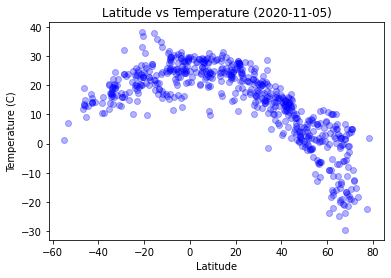

In [89]:
from datetime import datetime

plt.scatter(weatherpy_data["lat"], weatherpy_data["temp"], color='b', alpha=0.3)
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title(f'Latitude vs Temperature ({datetime.now().date()})')
plt.savefig("Temperature_Plot.png")
plt.show()

- The latitude versus temperature plot analyzes the relationship between temperature and the cities latitude. So this plot is displaying that the further from the equater you become the more drastic of change in temperature. The lower the latitude the lower the temperature and vice versa.

## Latitude vs. Humidity Plot

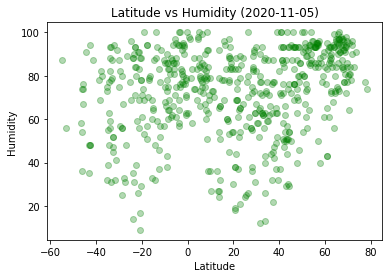

In [90]:
plt.scatter(weatherpy_data["lat"], weatherpy_data["humidity"], color='g', alpha=0.3)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Latitude vs Humidity ({datetime.now().date()})')
plt.savefig("Humidity_Plot.png")
plt.show()

- This plot is analyzing the relationship between humidity and latitude. From the scatter plot we can see that the highest humidity do not correlate to latitude. 

## Latitude vs. Cloudiness Plot

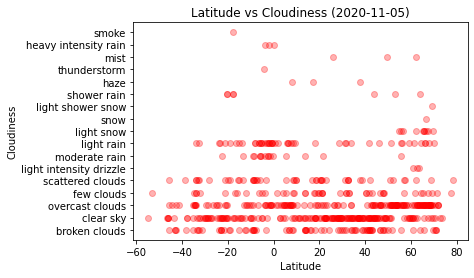

In [91]:
plt.scatter(weatherpy_data["lat"], weatherpy_data["cloudiness"], color='r', alpha=0.3)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Latitude vs Cloudiness ({datetime.now().date()})')
plt.savefig("Cloudiness_Plot.png")
plt.show()

- This plot analyzes the relationship between cloudiness and latitude and again from the sample tested there seems to be no relationship between latitude and cloudiness. 

## Latitude vs. Wind Speed Plot

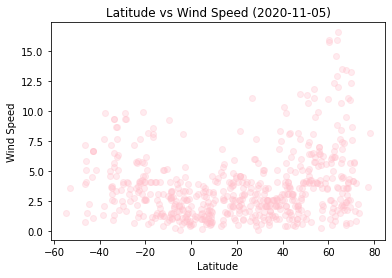

In [92]:
plt.scatter(weatherpy_data["lat"], weatherpy_data["wind_speed"], color='pink', alpha=0.3)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Latitude vs Wind Speed ({datetime.now().date()})')
plt.savefig("WindSpeed_Plot.png")
plt.show()

- This plot looks at wind speed and latitude. It looks like the data is pretty spread out among various latitudes, the highest wind speeds seem to be further from the equator. 

## Linear Regression

- The second requirement is to run linear regression on each relationship. This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

In [93]:
northern_hem = weatherpy_data.loc[weatherpy_data["lat"] >0]

southern_hem = weatherpy_data.loc[weatherpy_data["lat"] <0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [94]:
nh_slope, nh_int, nh_r, nh_p, nh_std_err = linregress(northern_hem['temp'], northern_hem['lat'])
nh_fit = nh_slope * northern_hem['temp'] + nh_int

In [95]:
nh_slope, nh_int, nh_r, nh_p, nh_std_err 

(-1.3193107626472467,
 53.30133067485002,
 -0.869806305687425,
 3.0160708456870912e-127,
 0.03704996118157789)

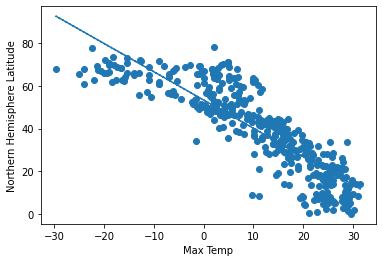

In [96]:
# Plot the linear model on top of scatter plot 
plt.scatter(northern_hem['temp'], northern_hem['lat'])
plt.plot(northern_hem['temp'],nh_fit,"--")
plt.xlabel('Max Temp')
plt.ylabel('Northern Hemisphere Latitude')
plt.savefig('Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png')
plt.show()

- The linear regression model looking at latitude and temperature shows a moderate negative correlation between latitude and maximum temperature in the northern hemisphere because the r-value is -0.87.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [97]:
sh_slope, sh_int, nh_r, nh_p, nh_std_err = linregress(southern_hem['temp'], southern_hem['lat'])
sh_fit = sh_slope * southern_hem['temp'] + sh_int

In [98]:
sh_slope, sh_int, nh_r, nh_p, nh_std_err

(1.2987903650608403,
 -47.62720137107932,
 0.606063349922788,
 1.9484285457226882e-20,
 0.12431875183745268)

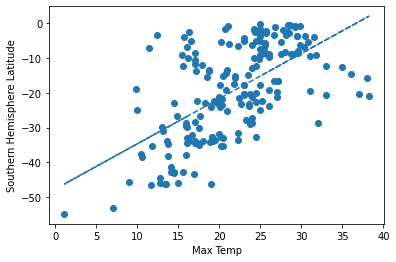

In [99]:
# Plot the linear model on top of scatter plot 
plt.scatter(southern_hem['temp'], southern_hem['lat'])
plt.plot(southern_hem['temp'],sh_fit,"--")
plt.xlabel('Max Temp')
plt.ylabel('Southern Hemisphere Latitude')
plt.savefig('Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png')
plt.show()

- This linear regression model looking at latitude and temperature shows a moderate positve correlation between latitude and maximum temperature in the southern hemisphere because the r-value is 0.61.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [100]:
nh_slope, nh_int, nh_r, nh_p, nh_std_err = linregress(northern_hem['humidity'], northern_hem['lat'])
nh_fit = nh_slope * northern_hem['humidity'] + nh_int

In [101]:
nh_slope, nh_int, nh_r, nh_p, nh_std_err 

(0.3098952147792844,
 16.124026377453685,
 0.29793082659676734,
 7.529675874764616e-10,
 0.04915696631772563)

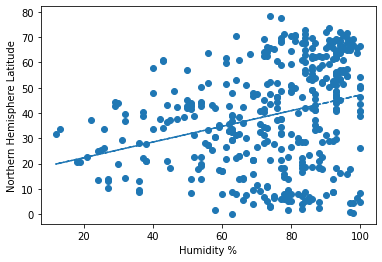

In [102]:
# Plot the linear model on top of scatter plot 
plt.scatter(northern_hem['humidity'], northern_hem['lat'])
plt.plot(northern_hem['humidity'],nh_fit,"--")
plt.xlabel('Humidity %')
plt.ylabel('Northern Hemisphere Latitude')
plt.savefig('Northern Hemisphere - Humidity vs. Latitude Linear Regression.png')
plt.show()

- This linear regression model looking at humidity and latitude shows a pretty weak correlation between latitude and humidity in the northern hemisphere because the r-value is 0.298.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [103]:
sh_slope, sh_int, sh_r, sh_p, sh_std_err = linregress(southern_hem['humidity'], southern_hem['lat'])
sh_fit = sh_slope * southern_hem['humidity'] + sh_int

In [104]:
sh_slope, sh_int, sh_r, sh_p, sh_std_err

(0.17148249544978214,
 -31.391663890574154,
 0.25645141075262823,
 0.0003549036076490809,
 0.047137148167693016)

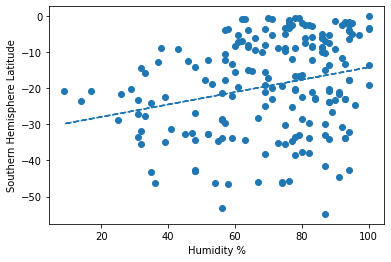

In [105]:
# Plot the linear model on top of scatter plot 
plt.scatter(southern_hem['humidity'], southern_hem['lat'])
plt.plot(southern_hem['humidity'],sh_fit,"--")
plt.xlabel('Humidity %')
plt.ylabel('Southern Hemisphere Latitude')
plt.savefig('Southern Hemisphere - Humidity vs. Latitude Linear Regression.png')
plt.show()

- This linear regression model looking at humidity and latitude shows a pretty weak correlation between latitude and humidity in the southern hemisphere as well with an r-value is 0.26.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [106]:
nh_slope, nh_str, nh_r, nh_p, nh_std_err = linregress(northern_hem['cloudiness_perct'], northern_hem['lat'])
nh_fit = nh_slope * northern_hem['cloudiness_perct'] + nh_str

In [107]:
nh_slope, nh_str, nh_r, nh_p, nh_std_err

(0.10945686537351818,
 33.43479836610376,
 0.22280798662849033,
 5.2353262136973425e-06,
 0.023709667781600285)

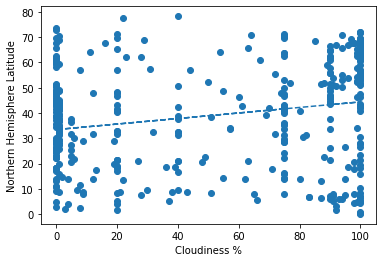

In [112]:
# Plot the linear model on top of scatter plot 
plt.scatter(northern_hem['cloudiness_perct'], northern_hem['lat'])
plt.plot(northern_hem['cloudiness_perct'],nh_fit,"--")
plt.xlabel('Cloudiness %')
plt.ylabel('Northern Hemisphere Latitude')
plt.savefig('Northern Hemisphere - Cloudiness % vs. Latitude Linear Regression.png')
plt.show()

- This linear regression model looking at cloudiness percentage and latitude shows a very weak or no correlation between latitude and humidity in the northern hemisphere as well with an r-value is 0.22.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [113]:
sh_slope, sh_int, sh_r, sh_p, sh_std_err = linregress(southern_hem['cloudiness_perct'], southern_hem['lat'])
sh_fit = sh_slope * southern_hem['cloudiness_perct'] + sh_int

In [114]:
sh_slope, sh_int, sh_r, sh_p, sh_std_err

(0.09425285854243759,
 -24.32020912667675,
 0.27463991412706595,
 0.00012573336771430873,
 0.024067031993704406)

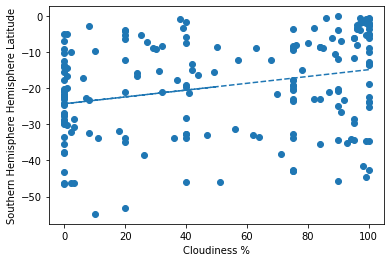

In [116]:
# Plot the linear model on top of scatter plot 
plt.scatter(southern_hem['cloudiness_perct'], southern_hem['lat'])
plt.plot(southern_hem['cloudiness_perct'],sh_fit,"--")
plt.xlabel('Cloudiness %')
plt.ylabel('Southern Hemisphere Hemisphere Latitude')
plt.savefig('Southern Hemisphere - Cloudiness % vs. Latitude Linear Regression.png')
plt.show()

- This linear regression model looking at cloudiness percentage and latitude shows a very weak or no correlation between latitude and humidity in the southern hemisphere as well with an r-value is 0.27.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [117]:
nh_slope, nh_str, nh_r, nh_p, nh_std_err = linregress(northern_hem['wind_speed'], northern_hem['lat'])
nh_fit = nh_slope * northern_hem['wind_speed'] + nh_str

In [118]:
nh_slope, nh_str, nh_r, nh_p, nh_std_err

(2.7600446723736902,
 28.703162780370313,
 0.40006522391894167,
 3.4378835089114945e-17,
 0.3130266987151746)

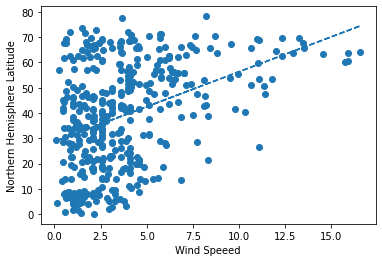

In [119]:
# Plot the linear model on top of scatter plot 
plt.scatter(northern_hem['wind_speed'], northern_hem['lat'])
plt.plot(northern_hem['wind_speed'],nh_fit,"--")
plt.xlabel('Wind Speeed')
plt.ylabel('Northern Hemisphere Latitude')
plt.savefig('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png')
plt.show()

- This linear regression model looking at wind speed and latitude shows a very weak correlation between latitude and windspeed in the northern hemisphere as well with an r-value is 0.4.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [120]:
sh_slope, sh_str, sh_r, sh_p, sh_std_err = linregress(southern_hem['wind_speed'], southern_hem['lat'])
sh_fit = sh_slope * southern_hem['wind_speed'] + sh_str

In [121]:
sh_slope, sh_str, sh_r, sh_p, sh_std_err

(-2.2248002058979,
 -11.505250391288948,
 -0.3914250528503217,
 2.3471888685053077e-08,
 0.3814612406032247)

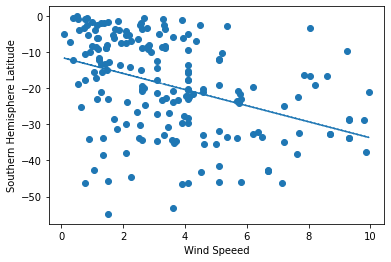

In [122]:
# Plot the linear model on top of scatter plot 
plt.scatter(southern_hem['wind_speed'], southern_hem['lat'])
plt.plot(southern_hem['wind_speed'],sh_fit,"--")
plt.xlabel('Wind Speeed')
plt.ylabel('Southern Hemisphere Latitude')
plt.savefig('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png')
plt.show()

- This linear regression model looking at wind speed and latitude shows a very weak negative correlation between latitude and windspeed in the southern hemisphere as well with an r-value is -0.39.